## Abstract

This blog post aims to replicate the study by Obermeyer et al. on the racial bias that exists in healthcare systems. In doing so, I compare the risk percentile assigned to black patients and white patients alongside their number of chronic illnesses. This recreation found that black patients were given lower risk scores even if they had the same number of chronic illnesses as white patients. I also compared medical expenditure with percentile risk score and number of chronic illnesses separately. This showed that, while costs were around the same by race when looking at different risk percentages, there was less expenditures for black patients when compared to white patients on the axis of chronic illnesses. This is further proven through the modelling done on the logarithmic cost, which estimates an expenditure for black patients at 75% of white patients. If care is supplied based on cost, then, we can see how unfair outcomes by race can arise.

First, I imported the dataset into a dataframe with pandas.

In [1]:
import pandas as pd
url = "https://gitlab.com/labsysmed/dissecting-bias/-/raw/master/data/data_new.csv?inline=false"
df = pd.read_csv(url)

Let's look at the data's columns.

In [2]:
df.head()

,risk_score_t,program_enrolled_t,cost_t,cost_avoidable_t,bps_mean_t,ghba1c_mean_t,hct_mean_t,cre_mean_t,ldl_mean_t,race,...,trig_min-high_tm1,trig_min-normal_tm1,trig_mean-low_tm1,trig_mean-high_tm1,trig_mean-normal_tm1,trig_max-low_tm1,trig_max-high_tm1,trig_max-normal_tm1,gagne_sum_tm1,gagne_sum_t
0,1.987430,0,1200.0,0.0,NaN,5.4,NaN,1.110000,194.0,white,...,0,0,0,0,0,0,0,0,0,0
1,7.677934,0,2600.0,0.0,119.0,5.5,40.4,0.860000,93.0,white,...,0,1,0,0,1,0,0,1,4,3
2,0.407678,0,500.0,0.0,NaN,NaN,NaN,NaN,NaN,white,...,0,0,0,0,0,0,0,0,0,0
3,0.798369,0,1300.0,0.0,117.0,NaN,NaN,NaN,NaN,white,...,0,0,0,0,0,0,0,0,0,0
4,17.513165,0,1100.0,0.0,116.0,NaN,34.1,1.303333,53.0,white,...,0,0,0,0,0,0,0,0,1,1


Then, I created a risk percentile out of the data's risk score by using pandas' qcut feature. I grouped the data by this percentile and race, then looked observed the mean number of chronic illnesses per group.

In [3]:
import numpy as np

df["risk_percentile"] = pd.qcut(df["risk_score_t"], 101, labels=False)

df["risk_percentile"]

gb = df.groupby(["risk_percentile", "race"])["gagne_sum_t"].mean().unstack(level=1)
gb

race,black,white
risk_percentile,,
0,0.069444,0.051724
1,0.240741,0.149847
2,0.277778,0.105495
3,0.266667,0.073810
4,0.200000,0.097514
...,...,...
96,5.460526,3.809877
97,4.882353,4.137681
98,5.761194,4.821853


Next, I graphed the risk percentile and mean number of chronic conditions grouped by race, recreating figure 1 of the study.

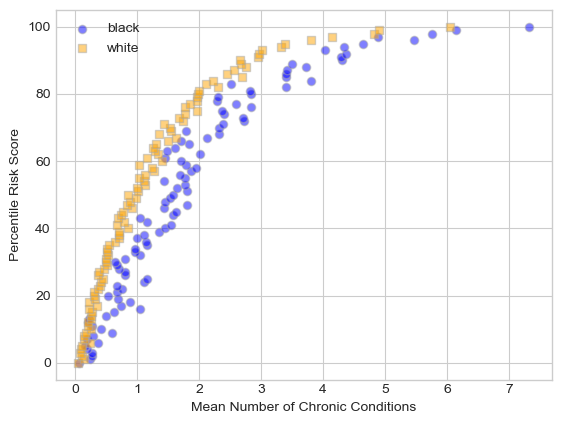

In [4]:
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

plt.style.use('seaborn-v0_8-whitegrid')

markers = ["o" , ","]

columns = ["black", "white"]

fig, ax = plt.subplots(1, 1)

for i in range(2):
    to_plot = gb[columns[i]]
    ax.scatter(to_plot.values, np.arange(0, 101, 1), c = f"{['blue', 'orange'][i]}", vmin = -0.5, vmax = 1.5, facecolors='none', edgecolors = "darkgrey", alpha = 0.5, label = f"{['black', 'white'][i]}", cmap = "BrBG", marker = markers[i])
    ax.legend()
    ax.set(xlabel="Mean Number of Chronic Conditions", ylabel = "Percentile Risk Score")

This graph shows that, if two patients have the same number of chronic illnesses but one is white and one is black, the white patient is much more likely to have a higher risk score. This, in turn, makes them more likely to be reccomended to the high-risk care management program when compared to a black patient with the same number of chronic conditions.

After this, I used the cost column alongside the number of chronic illnesses and the previously created risk percentile to make two more graphs. The first graph shows the mean cost compared to the risk percentile grouped by race. The second compares the cost and the number of chronic illnesses, also grouped by race.

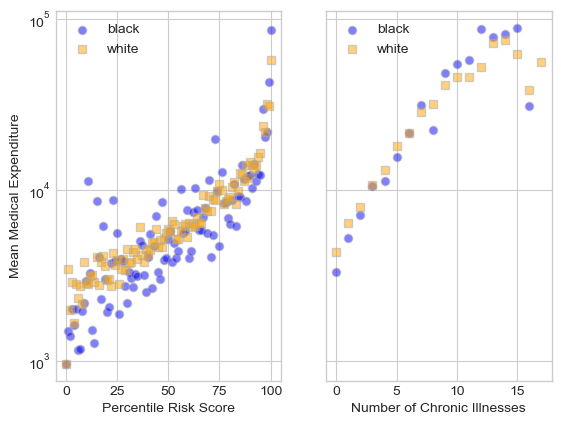

In [5]:
gb_cost = df.groupby(["risk_percentile", "race"])["cost_t"].mean().unstack(level=1)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

plt.yscale("log")

gb_chronic = df.groupby(["gagne_sum_t", "race"])["cost_t"].mean().unstack(level=1)

for i in range(2):    
    to_plot = gb_cost[columns[i]]
    ax1.scatter(np.arange(0, 101, 1), to_plot.values, c = f"{['blue', 'orange'][i]}", vmin = -0.5, vmax = 1.5, facecolors='none', edgecolors = "darkgrey", alpha = 0.5, label = f"{['black', 'white'][i]}", cmap = "BrBG", marker = markers[i])
    ax1.legend()
    ax1.set(xlabel = "Percentile Risk Score", ylabel="Mean Medical Expenditure")

    to_plot = gb_chronic[columns[i]]
    ax2.scatter(np.arange(0, 18, 1), to_plot.values, c = f"{['blue', 'orange'][i]}", vmin = -0.5, vmax = 1.5, facecolors='none', edgecolors = "darkgrey", alpha = 0.5, label = f"{['black', 'white'][i]}", cmap = "BrBG", marker = markers[i])
    ax2.legend()
    ax2.set(xlabel = "Number of Chronic Illnesses")

This graph shows that, while there isn't a cost disparity across race when comparing againsst percentile risk score, there is one when looking at the number of chronic illnesses. If we look at the datapoints at and below 5 chronic illnesses, where most patients lie, there is a lower average cost per black patients when compared to white patients. Considering the risk assessment model is done according to cost rather than illness, one can see how black patients would be disproportionately denied access to the program. 

Finally, we can model this cost disparity by looking at the data. This modelling experiment is informed on the equation:

$logcost \approx w_b$ $*$ (patient is black) $+$ intercept $+ \sum \limits _{i=1} ^{k} w_k * $(gagne sum)$^k$

Where $w_b$ is the weight a model gives to the variable that a patient is black and $w_k$ are the weights given to the polynomial data of the number of chronic illnesses.  

From this we also find that $e^{w_b}$ is the percentage of average cost incurred by black patients compared to white patients 

To start, we observe that 95% of the patients have 5 or less chronic illnesses, making it a good subset of the data to generalize over.

In [6]:
df[df["gagne_sum_t"] <= 5]["gagne_sum_t"].count()/df.shape[0]

0.9553952115447688

Next, we can create a new dataframe eithin that subset that creates a log-transform of the cost (ignoring any 0-cost patients). This allows us to look at data that spans orders of magnitude. Further, for the model to work, we must encode race as a number. In this case, 0 is coded to be white and 1 black.

In [7]:
df_log = df.query('gagne_sum_t <= 5 & cost_t != 0')
df_log["log_cost"] = np.log(df_log["cost_t"])

df_log["race_num"] = 1 * (df_log["race"] == "black")

Then we can take predictor and target columns of this data, where race and number of chronic illness are the predictors (X) and the log cost is the target (y).

In [8]:
pred_X = df_log[["race_num", "gagne_sum_t"]]
target_y = df_log["log_cost"]

In [9]:
df_log

,risk_score_t,program_enrolled_t,cost_t,cost_avoidable_t,bps_mean_t,ghba1c_mean_t,hct_mean_t,cre_mean_t,ldl_mean_t,race,...,trig_mean-high_tm1,trig_mean-normal_tm1,trig_max-low_tm1,trig_max-high_tm1,trig_max-normal_tm1,gagne_sum_tm1,gagne_sum_t,risk_percentile,log_cost,race_num
0,1.987430,0,1200.0,0.0,NaN,5.4,NaN,1.110000,194.0,white,...,0,0,0,0,0,0,0,35,7.090077,0
1,7.677934,0,2600.0,0.0,119.0,5.5,40.4,0.860000,93.0,white,...,0,1,0,0,1,4,3,86,7.863267,0
2,0.407678,0,500.0,0.0,NaN,NaN,NaN,NaN,NaN,white,...,0,0,0,0,0,0,0,3,6.214608,0
3,0.798369,0,1300.0,0.0,117.0,NaN,NaN,NaN,NaN,white,...,0,0,0,0,0,0,0,11,7.170120,0
4,17.513165,0,1100.0,0.0,116.0,NaN,34.1,1.303333,53.0,white,...,0,0,0,0,0,1,1,98,7.003065,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48779,0.611517,0,800.0,0.0,NaN,NaN,NaN,1.090000,148.0,white,...,0,0,0,0,0,0,0,7,6.684612,0
48780,2.615933,0,2200.0,0.0,112.0,NaN,41.4,0.810000,172.0,white,...,0,1,0,0,1,1,1,46,7.696213,0
48781,1.358926,0,800.0,0.0,105.0,NaN,NaN,NaN,NaN,white,...,0,1,0,0,1,1,0,23,6.684612,0
48782,10.990318,0,1300.0,0.0,132.0,NaN,NaN,NaN,NaN,white,...,0,0,0,0,0,3,3,94,7.170120,0


The function add_polynomial_features returns a dataset with exponential values of the number of chronic illnesses. This is useful for training models that act on non-linear data.

In [10]:
def add_polynomial_features(X, degree):
  X_ = X.copy()
  for j in range(1, degree):
    X_[f"poly_{j}"] = X_["gagne_sum_t"]**j
  return X_

Performing cross-validation on the degrees of the polynomial finds the most accurate to be a degree of 6. 

In [11]:
from sklearn.linear_model import LinearRegression

record = (0, 0)

for degree in range (1, 15):
    poly_X = add_polynomial_features(pred_X, degree)

    LinR = LinearRegression()
    LinR.fit(poly_X, target_y)
    tempScore = LinR.score(poly_X, target_y)
    # print(degree, tempScore)
    if tempScore > record[1]:
        record = (degree, tempScore)
record

(6, 0.08800788381979874)

If we fit the model to this polynomial dataset and the target variable, we find can find the value of wb by looking at the first coefficient of our linear regression model.

In [12]:
poly_X = add_polynomial_features(pred_X, 6)
LinR = LinearRegression()
LinR.fit(poly_X, target_y)
# LinR.score(poly_X, target_y)
LinR.coef_[0]

-0.2827181024769897

Finally, we can get an percentage of average cost paid by black patients when compared to white patients by calculating $e^{w_b}$.

In [13]:
percent = np.exp(LinR.coef_[0])
percent

0.7537322331639498

This percentage of around 75% makes sense with regard to the study. Specifically, the study notes that "Blacks generate lower costs than Whites -- on average, $1801 less per year..." "... or $1144 less, if we instead hold constant the specific individual illnesses that contribute to the sum." This roughly lines up with the model's prediction that black people will have a 75% lower mean total medical expenditure compared to white people.

## Discussion

In the process of replicating this study, I confirmed the findings that black patients are more likely to be placed in lower risk percentiles given equal prevalence of chronic illness when compared to white patients. I also confirmed that, while costs are relatively similar between patients of the same risk percentile and different races, costs are disparate (black patients have less cost) when comparing between chronic illness. This was then quantified through a model, with a prediction of black patients having 75% of the cost of white patients. With the risk score being calculated with respect to cost, then, disparate outcomes across races are seen considering a more realistic risk variable like chronic illness count.

As such, the discrimination criteria of calibration bias is present in the formation of the risk score. This is seen through the dissection of risk score when compared against chronic illness versus cost. While there isn't much bias in calculating risk score across race when cost is considering factor, there is bias when considering risk score in relation to number of chronic illness. That is to say, those with similar risk scores will have similar costs across race (the second graph in the blog post and figure 3A in the study), but will have dissimilar numbers of chronic illnesses, with black patients having more chronic illnesses at similar risk scores on average (the first graph and figure 1 in the study). The model is then calibrated to the variable of cost rather than health outcome, a fact that is mentioned at the beginning of the study: "...assessing how well the algorithmic risk score is calibrated across race for health outcomes $H_{i,t}$. We also ask how well the algorithm is calibrated for costs $C_{i,t}$."

Through this blog post, I improved my graphing skills, especially when needing to graph different groups on the same graph. I also improved my ability in modelling with polynomial datasets and transforming data to be more useful to my models and graphs (log-transforms, qcuts, etc.). 